In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df['bathrooms'].nunique())

29


In [5]:
# practice code (not relevant for project)
uniq_col = []

for col in df:
    uniq_col.append(df[col].nunique())
uniq_col

[21420,
 372,
 3622,
 12,
 29,
 1034,
 9776,
 6,
 2,
 5,
 5,
 11,
 942,
 304,
 116,
 70,
 70,
 5033,
 751,
 777,
 8682]

In [6]:
# test - create column, where waterfront is 1, substitute 1 with price
df['water_1'] = np.where(df['waterfront'] >0, df['price'], 0)

In [7]:
df['water_1'].describe()

count    2.159700e+04
mean     1.160871e+04
std      1.691426e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.060000e+06
Name: water_1, dtype: float64

In [8]:
df.water_1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
21567    0.0
21568    0.0
21569    0.0
21570    0.0
21571    0.0
21572    0.0
21573    0.0
21574    0.0
21575    0.0
21576    0.0
21577    0.0
21578    0.0
21579    0.0
21580    0.0
21581    0.0
21582    0.0
21583    0.0
21584    0.0
21585    0.0
21586    0.0
21587    0.0
21588    0.0
21589    0.0
21590    0.0
21591    0.0
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: water_1, Length: 21597, dtype: float64

# Future Help
* **identify text in columns** - I'm pretty sure that this is relatively common.
Someone enters text into a numeric column and everything gets converted into a string.
Having trouble separating values with decimals from strings


In [9]:
# test code (not required for project. I'm interested in discovering an easier way to identify rouge data enteries
#     that force a numeric column into a object. The decimal makes the real numeric values harder to separate.
#     May need to use str.replace)

s1 = pd.Series(['one', 'x', '1', '15.0', '2.4'])
s1.str.isnumeric()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [10]:
# calculating distance
# Seattle = 47.608013, -122.335167
# approx one degree of latitude ellipsoidal earth at 47N: 69.08 miles


def distance(Lat2, Long2):
    Lat1 = 47.608013
    Long1 = -122.335167
    x = Lat2 - Lat1
    y = (Long2 - Long1) * np.cos((Lat2 + Lat1)*(0.5 * np.pi/180))  
    return 69.08 * np.sqrt(x*x + y*y)

distance(47.5112, -122.257)

7.616113362022828

In [11]:
df['Miles_Seattle'] = df.apply(lambda x: distance(x['lat'], x['long']), axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,7.616113
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,7.841298
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,10.153451
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,6.600281
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,13.526635


In [30]:
df['Miles_Seattle'] = df.apply(lambda x: distance(x['lat'], x['long']), axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,7.616113
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,7.841298
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,10.153451
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,6.600281
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,13.526635


In [12]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,6.326222
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,6.837770
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1.929344
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,13.404291
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357,0.0,1.939534


In [13]:
df['north_Seattle'] = np.where(df['lat'] > 47.608013 , 1, 0)

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,7.616113,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,7.841298,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,10.153451,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,6.600281,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,13.526635,1


In [15]:
df['east_Seattle'] = np.where(df['long'] > -122.335167 , 1, 0)

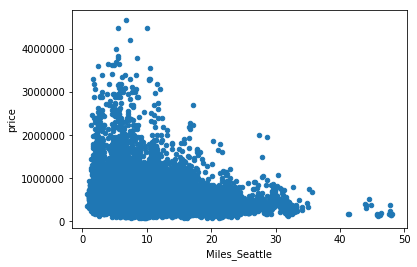

In [227]:
df.plot(kind='scatter', x='Miles_Seattle', y='price');

In [223]:
# calculating distance
# Bellevue = 47.610378, -122.200676
# approx one degree of latitude ellipsoidal earth at 47N: 69.08 miles


def distance2(Lat2, Long2):
    Lat1 = 47.610378
    Long1 = -122.200676
    x = Lat2 - Lat1
    y = (Long2 - Long1) * np.cos((Lat2 + Lat1)*(0.5 * np.pi/180))  
    return 69.08 * np.sqrt(x*x + y*y)

distance2(47.5112, -122.257)

7.337087369718484

In [225]:
df['Miles_Bellevue'] = df.apply(lambda x: distance2(x['lat'], x['long']), axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,-122.257,1340,5650,0.0,7.616113,0,1,0,0,7.337087
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,-122.319,1690,7639,0.0,7.841298,1,1,0,0,9.417982
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,-122.233,2720,8062,0.0,10.153451,1,1,0,0,8.936610
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,-122.393,1360,5000,0.0,6.600281,0,0,0,0,10.892849
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,-122.045,1800,7503,0.0,13.526635,1,1,0,0,7.263191


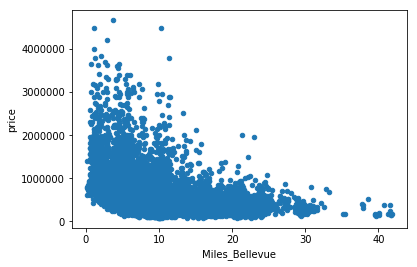

In [226]:
df.plot(kind='scatter', x='Miles_Bellevue', y='price');

In [253]:
df['near_Bellevue'] = np.where(df['Miles_Bellevue'] <= 2.5 , 1, 0)

In [254]:
bell_df = df[df['near_Bellevue'] == 1]

In [255]:
bell_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
47,4178300310,7/16/2014,785000.0,4,2.50,2290,13416,2.0,0.0,0.0,...,2680,13685,0.0,8.612398,1,1,0,0,2.395775,1
66,3394100030,9/9/2014,975000.0,4,2.50,2720,11049,2.0,NaN,0.0,...,2750,11049,0.0,6.916410,0,1,1,0,2.035423,1
69,1802000060,6/12/2014,1330000.0,5,2.25,3200,20158,1.0,0.0,0.0,...,3390,20158,0.0,5.803371,1,1,1,0,1.529314,1
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,2370,8113,0.0,6.738788,0,1,1,0,2.013617,1
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,3060,11275,0.0,5.751398,1,1,1,0,0.586698,1


In [256]:
bell_df.shape

(524, 29)

In [257]:
bell_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
count,5.240000e+02,5.240000e+02,524.000000,524.000000,524.000000,524.000000,524.000000,470.000000,523.00000,524.000000,...,524.000000,524.000000,5.240000e+02,524.000000,524.000000,524.0,524.000000,524.0,524.000000,524.0
mean,4.573239e+09,1.185234e+06,3.820611,2.515744,2795.358779,13352.643130,1.393130,0.002128,0.24283,3.557252,...,2606.793893,12816.196565,7.347328e+03,6.549129,0.538168,1.0,0.961832,0.0,1.604174,1.0
std,3.030682e+09,6.443811e+05,0.893077,0.907724,1151.567480,7416.796302,0.499551,0.046127,0.75577,0.635596,...,697.189131,5999.168522,1.681880e+05,1.041480,0.499017,0.0,0.191785,0.0,0.583165,0.0
min,2.490001e+08,3.500000e+05,2.000000,1.000000,860.000000,779.000000,1.000000,0.000000,0.00000,1.000000,...,1290.000000,794.000000,0.000000e+00,4.364908,0.000000,1.0,0.000000,0.0,0.188461,1.0
25%,2.075275e+09,7.433750e+05,3.000000,1.750000,1937.500000,8994.000000,1.000000,0.000000,0.00000,3.000000,...,2080.000000,9383.500000,0.000000e+00,5.814699,0.000000,1.0,1.000000,0.0,1.164103,1.0
50%,3.861400e+09,9.442500e+05,4.000000,2.500000,2595.000000,11058.000000,1.000000,0.000000,0.00000,3.500000,...,2490.000000,11179.500000,0.000000e+00,6.429484,1.000000,1.0,1.000000,0.0,1.670886,1.0
75%,7.578575e+09,1.517500e+06,4.000000,3.000000,3495.000000,16111.750000,2.000000,0.000000,0.00000,4.000000,...,3010.000000,15030.750000,0.000000e+00,7.498397,1.000000,1.0,1.000000,0.0,2.071357,1.0
max,9.808700e+09,4.490000e+06,8.000000,6.000000,7080.000000,70131.000000,3.000000,1.000000,4.00000,5.000000,...,5500.000000,48787.000000,3.850000e+06,8.707023,1.000000,1.0,1.000000,0.0,2.499668,1.0


In [234]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
count,2.159000e+04,2.159000e+04,21590.000000,21590.000000,21590.000000,2.159000e+04,21590.000000,19214.000000,21528.000000,21590.000000,...,21590.000000,21590.000000,2.159000e+04,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000
mean,4.579830e+09,5.384810e+05,3.372534,2.114555,2078.005141,1.509385e+04,1.493909,0.007442,0.233138,3.409866,...,1985.952710,12754.338490,1.080330e+04,11.535349,0.424085,0.768782,0.153358,0.113710,10.733642,0.995183
std,2.876424e+09,3.528866e+05,0.925666,0.765532,908.799999,4.141800e+04,0.539661,0.085950,0.764172,0.650596,...,684.294679,27277.481117,1.543282e+05,6.667465,0.494215,0.421621,0.360341,0.317466,5.646362,0.069239
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,399.000000,651.000000,0.000000e+00,0.768335,0.000000,0.000000,0.000000,0.000000,0.188461,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1490.000000,5100.000000,0.000000e+00,6.069251,0.000000,1.000000,0.000000,0.000000,7.050877,1.000000
50%,3.904926e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,0.000000,3.000000,...,1840.000000,7620.000000,0.000000e+00,10.323084,0.000000,1.000000,0.000000,0.000000,9.447118,1.000000
75%,7.308825e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067350e+04,2.000000,0.000000,0.000000,4.000000,...,2360.000000,10080.000000,0.000000e+00,15.814832,1.000000,1.000000,0.000000,0.000000,13.201743,1.000000
max,9.900000e+09,4.670000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,6210.000000,871200.000000,4.670000e+06,48.016100,1.000000,1.000000,1.000000,1.000000,41.812188,1.000000


In [258]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
id,1.000000,-0.021496,0.000588,0.003981,-0.014253,-0.132006,0.018374,-0.005218,0.010839,-0.023798,...,-0.003561,-0.138720,-0.005318,0.005619,-0.012413,0.017872,-0.038656,0.007538,-0.002268,-0.000361
price,-0.021496,1.000000,0.310147,0.522965,0.696616,0.091471,0.261744,0.265370,0.395943,0.038382,...,0.594736,0.084016,0.332651,-0.293354,0.260967,0.028807,0.486022,-0.264189,-0.418660,0.289060
bedrooms,0.000588,0.310147,1.000000,0.513423,0.578968,0.032217,0.177333,-0.006179,0.076646,0.026570,...,0.392126,0.030394,0.017575,0.059825,-0.020849,0.156150,0.125889,-0.002612,-0.057984,0.076345
bathrooms,0.003981,0.522965,0.513423,1.000000,0.753616,0.088132,0.503146,0.061064,0.182566,-0.126943,...,0.568350,0.087979,0.090675,0.086022,0.011249,0.142593,0.177354,-0.076282,-0.063102,0.082655
sqft_living,-0.014253,0.696616,0.578968,0.753616,1.000000,0.174210,0.354847,0.100168,0.278235,-0.059659,...,0.757803,0.185190,0.138964,0.079073,0.018417,0.175090,0.241368,-0.092933,-0.104855,0.124494
sqft_lot,-0.132006,0.091471,0.032217,0.088132,0.174210,1.000000,-0.004954,0.022470,0.075051,-0.008784,...,0.144612,0.718199,0.014828,0.242943,-0.045728,0.086105,-0.044292,-0.033203,0.176466,-0.006630
floors,0.018374,0.261744,0.177333,0.503146,0.354847,-0.004954,1.000000,0.020450,0.027457,-0.264132,...,0.279550,-0.010854,0.028356,0.003358,0.049804,0.012845,0.065543,-0.102346,-0.036596,-0.029453
waterfront,-0.005218,0.265370,-0.006179,0.061064,0.100168,0.022470,0.020450,1.000000,0.406134,0.018035,...,0.084965,0.031505,0.857214,-0.013905,-0.031306,-0.025705,0.011847,-0.025478,-0.009449,-0.009792
view,0.010839,0.395943,0.076646,0.182566,0.278235,0.075051,0.027457,0.406134,1.000000,0.046174,...,0.277544,0.073026,0.332474,-0.074578,-0.033229,-0.088955,0.096872,-0.071529,-0.043594,0.002001
condition,-0.023798,0.038382,0.026570,-0.126943,-0.059659,-0.008784,-0.264132,0.018035,0.046174,1.000000,...,-0.093054,-0.003056,0.013445,-0.073188,-0.001834,-0.039168,0.075067,-0.007899,-0.043893,0.035730


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# placedholder - may need to transform individually, and then concat together??
# data_mini = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
# data_ols.head()

In [51]:
# drop outliers - rerun model. Inc outliers. r2 = 0.493 (one variable), r2= 0.624 (3 variable)

#df.drop(df[df["bedrooms"] == 33].index, inplace = True)
df.drop(df.loc[df['price'] > 5000000].index, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0.0,7.616113,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,0.0,7.841298,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,0.0,10.153451,1,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,0.0,6.600281,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,0.0,13.526635,1,1


In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle
count,2.159000e+04,2.159000e+04,21590.000000,21590.000000,21590.000000,2.159000e+04,21590.000000,19214.000000,21528.000000,21590.000000,...,17749.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,2.159000e+04,21590.000000,21590.000000,21590.000000
mean,4.579830e+09,5.384810e+05,3.372534,2.114555,2078.005141,1.509385e+04,1.493909,0.007442,0.233138,3.409866,...,83.440363,98077.965030,47.560071,-122.213975,1985.952710,12754.338490,1.080330e+04,11.535349,0.424085,0.768782
std,2.876424e+09,3.528866e+05,0.925666,0.765532,908.799999,4.141800e+04,0.539661,0.085950,0.764172,0.650596,...,399.497601,53.513951,0.138568,0.140744,684.294679,27277.481117,1.543282e+05,6.667465,0.494215,0.421621
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000e+00,0.768335,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98033.000000,47.471025,-122.328000,1490.000000,5100.000000,0.000000e+00,6.069251,0.000000,1.000000
50%,3.904926e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000e+00,10.323084,0.000000,1.000000
75%,7.308825e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067350e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,0.000000e+00,15.814832,1.000000,1.000000
max,9.900000e+09,4.670000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4.670000e+06,48.016100,1.000000,1.000000


In [53]:
df.shape

(21590, 25)

In [67]:
data_mini = df[['price', 'sqft_above', 'Miles_Seattle', 'north_Seattle']]
data_mini.head()

,price,sqft_above,Miles_Seattle,north_Seattle
0,221900.0,1180,7.616113,0
1,538000.0,2170,7.841298,1
2,180000.0,770,10.153451,1
3,604000.0,1050,6.600281,0
4,510000.0,1680,13.526635,1


In [68]:
formula = "price ~ sqft_above"
model = ols(formula= formula, data=data_mini).fit()

In [69]:
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:16:43   Log-Likelihood:            -3.0159e+05
No. Observations:               21590   AIC:                         6.032e+05
Df Residuals:                   21588   BIC:                         6.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.773e+04   4593.267     16.923      0.000    6.87e+04    8.67e+04
sqft_above   257.8485      2.335    110.419      0.000     253.271     262.426
==============================================================================
Omnibus:                    13018.852   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215801.495
Skew:                           2.601   Prob(JB):                         0.00
Kurtosis:                      17.589   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
outcome = 'price'
predictors = data_mini.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [71]:
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     8843.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:17:12   Log-Likelihood:            -2.9777e+05
No. Observations:               21590   AIC:                         5.955e+05
Df Residuals:                   21586   BIC:                         5.956e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.104e+05   5006.528     42.021      0.000    2.01e+05     2.2e+05
sqft_above      290.1825      1.999    145.147      0.000     286.264     294.101
Miles_Seattle -1.997e+04    264.647    -75.474      0.000   -2.05e+04   -1.95e+04
north_Seattle  9.427e+04   3501.866     26.920      0.000    8.74e+04    1.01e+05
==============================================================================
Omnibus:                    15090.466   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408300.788
Skew:                           3.020   Prob(JB):                         0.00
Kurtosis:                      23.430   Cond. No.                     6.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
formula = "price ~ north_Seattle"
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1578.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:17:17   Log-Likelihood:            -3.0566e+05
No. Observations:               21590   AIC:                         6.113e+05
Df Residuals:                   21588   BIC:                         6.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.595e+05   3055.088    150.391      0.000    4.53e+05    4.65e+05
north_Seattle  1.863e+05   4691.342     39.720      0.000    1.77e+05    1.96e+05
==============================================================================
Omnibus:                    15756.343   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           338603.388
Skew:                           3.321   Prob(JB):                         0.00
Kurtosis:                      21.229   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
target = df[['price']]
data_pred = df[['sqft_living', 'Miles_Seattle', 'north_Seattle']]

In [61]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(data_pred, target)
print(linreg.intercept_)
print(linreg.coef_)

[100252.63368811]
[[   278.70323465 -15858.79477758  99079.99965108]]


In [62]:
# how to drop one predictor - orig_3 in sk learn
# predictors = predictors.drop("orig_3",axis=1)
# linreg.fit(predictors, y)
# linreg.coef_

In [63]:
yhat = linreg.predict(data_pred)

In [64]:
y = target

In [65]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-data_pred.shape[1]-1)

In [66]:
print(r_squared)
print(adjusted_r_squared)

price    0.62411
dtype: float64
price    0.624057
dtype: float64


$SS_{residual} = \sum (y - \hat{y})^2 $

$SS_{total} = \sum (y - \bar{y})^2 $

$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$

$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$

In [84]:
df.groupby('view')['price', 'sqft_living'].count()

,price,sqft_living
view,,
0.0,19421,19421
1.0,330,330
2.0,956,956
3.0,507,507
4.0,314,314


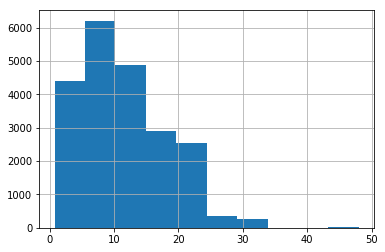

In [87]:
df.Miles_Seattle.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE6CDF0978>]],
      dtype=object)

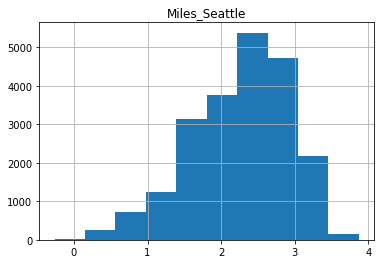

In [88]:
data_log = pd.DataFrame([])
data_log["Miles_Seattle"] = np.log(df["Miles_Seattle"])
data_log.hist()

In [90]:
logmiles = np.log(df['Miles_Seattle'])

# minmax scaling
#df1['Miles_Seattle'] = (logmiles-min(logmiles))/(max(logmiles)-min(logmiles))
mm = (logmiles-min(logmiles))/(max(logmiles)-min(logmiles))

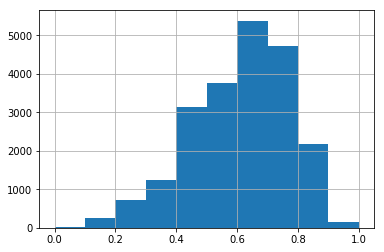

In [91]:
mm.hist()

In [94]:
logbase = np.log(df['price']+1)

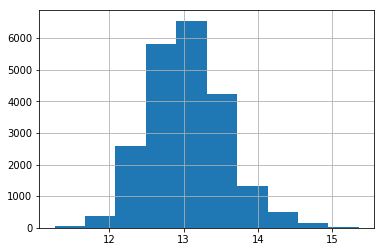

In [95]:
logbase.hist()

In [172]:
hi = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(13)
hi_zip_list = hi.keys().tolist()
df['hi_zip'] = np.where(df['zipcode'].isin(hi_zip_list), 1, 0)
print(h)
print(hi_zip_list)
df.head()

zipcode
98039    1.991771e+06
98004    1.325740e+06
98040    1.180265e+06
98112    1.096239e+06
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98102    8.335844e+05
98005    8.102897e+05
98033    7.940001e+05
98199    7.921879e+05
98075    7.907347e+05
Name: price, dtype: float64
[98039, 98004, 98040, 98112, 98109, 98105, 98006, 98119, 98102, 98005, 98033, 98199, 98075]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,0.0,7.616113,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,0.0,7.841298,1,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0.0,10.153451,1,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0.0,6.600281,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0.0,13.526635,1,1,0


In [179]:
lo = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).tail(10)
low_zip_list = lo.keys().tolist()
df['low_zip'] = np.where(df['zipcode'].isin(low_zip_list), 1, 0)
print(l)
print(low_zip_list)

zipcode
98031    300340.402930
98030    296187.980469
98003    294111.278571
98188    289078.345588
98023    286742.811623
98148    284908.596491
98001    281194.869806
98032    251296.240000
98168    240328.371747
98002    234284.035176
Name: price, dtype: float64
[98031, 98030, 98003, 98188, 98023, 98148, 98001, 98032, 98168, 98002]


In [182]:
print(df.hi_zip.value_counts())
print(df.low_zip.value_counts())
df.head()

0    18279
1     3311
Name: hi_zip, dtype: int64
0    19135
1     2455
Name: low_zip, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,0.0,7.616113,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,0.0,7.841298,1,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,0.0,10.153451,1,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,0.0,6.600281,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,0.0,13.526635,1,1,0,0


(1960, 1980]    4935
(2000, 2020]    4535
(1980, 2000]    4489
(1940, 1960]    4305
(1900, 1940]    3239
Name: yr_built, dtype: int64

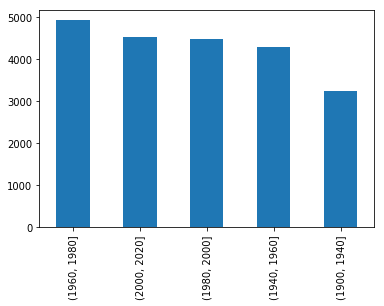

In [221]:
# create bins for based on observed values.
bins = [1900, 1940, 1960, 1980, 2000, 2020]
# use pd.cut
bins_yr = pd.cut(df['yr_built'], bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
#bins_yr = bins_yr.cat.as_unordered()
#bins_yr.head()

# inspect the result
bins_yr.value_counts().plot(kind='bar')
bins_yr.value_counts()
# replace the existing "yr_built" column
#df["yr_built"]=bins_yr

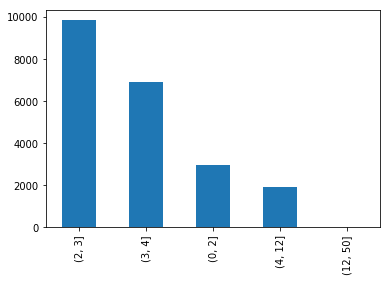

In [198]:
# create bins for based on observed values.
bd_bins = [0,2,3,4,12,50]
# use pd.cut
bins_bed = pd.cut(df['bedrooms'], bd_bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
#bins_yr = bins_yr.cat.as_unordered()
#bins_yr.head()

# inspect the result
bins_bed.value_counts().plot(kind='bar')

# replace the existing "yr_built" column
#df["yr_built"]=bins_yr

(2.0, 2.5]      7424
(0.0, 1.5]      5380
(1.5, 2.0]      4978
(2.5, 3.0]      1938
(3.0, 4.0]      1611
(4.0, 7.75]      258
(7.75, 50.0]       1
Name: bathrooms, dtype: int64

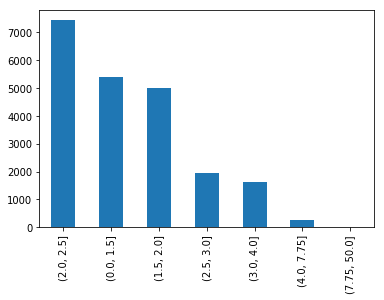

In [214]:
bt_bins = [0,1.5,2,2.5,3,4,7.75,50]
# use pd.cut
bins_bath = pd.cut(df['bathrooms'], bt_bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
#bins_yr = bins_yr.cat.as_unordered()
bins_bath.head()

# inspect the result
bins_bath.value_counts().plot(kind='bar')
bins_bath.value_counts()

(0.0, 1.5]     12583
(1.5, 2.0]      8229
(2.0, 10.0]      778
Name: floors, dtype: int64

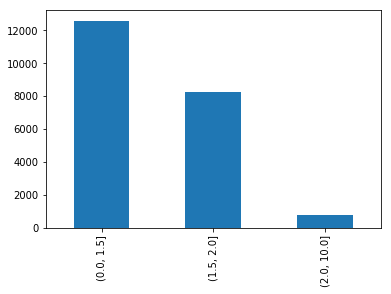

In [216]:
flr_bins = [0,1.5,2,10]
# use pd.cut
bins_floor = pd.cut(df['floors'], flr_bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
#bins_yr = bins_yr.cat.as_unordered()
bins_floor.head()

# inspect the result
bins_floor.value_counts().plot(kind='bar')
bins_floor.value_counts()

(6, 7]      8974
(7, 8]      6065
(8, 9]      2615
(5, 6]      2038
(9, 10]     1134
(10, 12]     484
(0, 5]       270
(12, 14]      10
Name: grade, dtype: int64

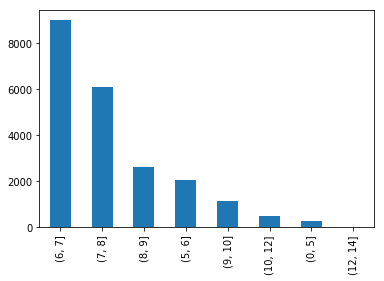

In [220]:
grd_bins = [0,5,6,7,8,9,10,12,14]
# use pd.cut
bins_grade = pd.cut(df['grade'], grd_bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
#bins_yr = bins_yr.cat.as_unordered()
bins_grade.head()

# inspect the result
bins_grade.value_counts().plot(kind='bar')
bins_grade.value_counts()

In [264]:
df.loc[(df['price'] < 100000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,1200,7500,0.0,20.050106,1,1,0,0,13.850426,0
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,1572,10570,0.0,9.036537,0,1,0,1,10.049830,0
3106,1721801591,2/19/2015,89950.0,1,1.00,570,4080,1.0,0.0,0.0,...,890,5100,0.0,6.784772,0,1,0,0,9.322064,0
3318,2724200705,12/12/2014,95000.0,2,1.00,800,8550,1.0,0.0,0.0,...,1490,8550,0.0,13.984007,0,1,0,0,14.675766,0
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,...,1490,18630,0.0,9.650352,0,1,0,1,9.897173,0
3801,7335400215,5/5/2015,95000.0,1,0.75,760,5746,1.0,0.0,0.0,...,970,6696,0.0,21.698291,0,1,0,1,21.133737,0
5298,5128000010,1/5/2015,99000.0,2,1.00,960,8236,1.0,NaN,0.0,...,1260,8236,0.0,12.385396,0,1,0,0,9.844845,0
5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,0.0,...,840,9324,0.0,19.339850,0,0,0,1,20.601255,0
5860,9320900420,10/14/2014,89000.0,3,1.00,900,4750,1.0,0.0,0.0,...,900,3404,0.0,21.137947,0,0,0,1,22.572733,0
7985,2734100835,3/3/2015,90000.0,1,1.00,780,4000,1.0,0.0,0.0,...,1150,4000,0.0,4.580379,0,1,0,0,7.313938,0


In [270]:
df.iloc[11532:11538]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,water_1,Miles_Seattle,north_Seattle,east_Seattle,hi_zip,low_zip,Miles_Bellevue,near_Bellevue
11539,1938000140,4/28/2015,810000.0,4,2.00,2920,10424,1.0,0.0,0.0,...,2360,10696,0.0,7.730470,0,1,1,0,2.064029,1
11540,4331000400,2/20/2015,252000.0,3,1.50,1150,13200,1.0,0.0,0.0,...,1220,13066,0.0,9.186173,0,0,0,0,11.510603,0
11541,4031700030,4/10/2015,299999.0,3,2.50,2380,9719,2.0,0.0,0.0,...,2830,11505,0.0,21.883391,0,1,0,1,22.245567,0
11542,1722800860,3/9/2015,400000.0,3,2.75,2220,5000,2.0,0.0,0.0,...,960,5000,0.0,3.938446,0,1,0,0,7.040352,0
11543,2491200955,12/29/2014,530000.0,5,2.00,3020,6000,1.5,0.0,0.0,...,1380,6000,0.0,6.353441,0,0,0,0,10.329242,0
11544,2013802030,9/11/2014,357000.0,3,2.00,2460,53882,1.0,1.0,4.0,...,2660,32625,357000.0,15.682331,0,1,0,0,16.868003,0


In [278]:
df.waterfront = df.waterfront.fillna(0)

In [279]:
df['waterfront'].value_counts()

0.0    21447
1.0      143
Name: waterfront, dtype: int64

In [287]:
df['new_wtr'] = np.where((df['waterfront'] == 1) & (df['zipcode'] != 98070) & (df['zipcode'] != 98198), 1, 0)

# np.where(((df.A < borderE) & ((df.B - df.C) < ex)), 'r', 'b')

In [288]:
df['new_wtr'].value_counts()

0    21476
1      114
Name: new_wtr, dtype: int64

In [289]:
df.new_wtr.describe()

count    21590.000000
mean         0.005280
std          0.072475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: new_wtr, dtype: float64

### 